In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
D, labels = make_blobs(n_samples=500, centers=3, cluster_std=.3, random_state=0)

#We will start off by making gaussian blobs. 
#That is a fancy way of saying that we will create point sets 
#that are ball shaped that tend to have more points closer to the center of the blob 
#and less as we move further away from the center. 
#Indeed, the density of the blob is dictated by a Gaussian distribution 
#in which we can specify various parameters of the distribution.

In [ ]:
D.shape
#500 points in 2D

(500, 2)

Text(0.5, 1.0, '2d clusters')

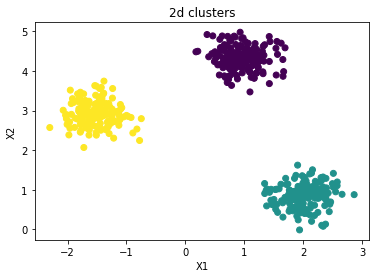

In [ ]:
plt.scatter(D[:,0], D[:,1], c=labels)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('2d clusters')

#three centers because we specified three centers in make_blobs function

In [ ]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(D)

#we have to tell how many clusters we would like to persue. 
#n_clusters=3 means that we want to see 3 clusters.

In [ ]:
pred_labels[:100]

#we get to which cluster each point belongs in this

array([2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 0, 0,
       0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0,
       0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1,
       2, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1,
       1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 1, 2], dtype=int32)

Text(0.5, 1.0, '2d clusters')

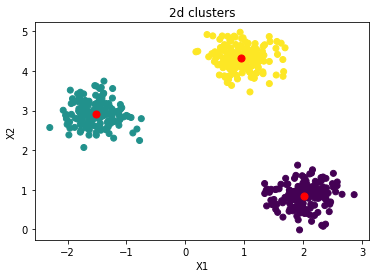

In [ ]:
centers = kmeans.cluster_centers_
centers

plt.scatter(D[:,0], D[:,1], c=pred_labels)
plt.scatter(centers[:,0], centers[:,1], s=50, c='red')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("2d clusters")

#the red point shows the center of the cluster for each cluster
#we initially set the center as the cluster centers of K means

In [ ]:
kmeans.inertia_

#Given a clustering, we can compute the value of the function. 
#sklearn calls it 'inertia'

85.83064567351516

Inertia of kmeans with 3 clusters 85.83064567351516
Inertia of kmeans with 4 clusters 74.44985678646738


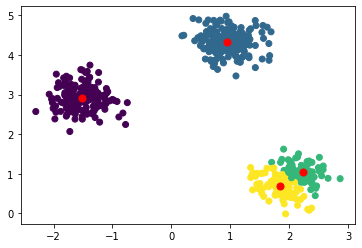

In [ ]:
kmeans4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
pred_labels = kmeans4.fit_predict(D)

centers = kmeans4.cluster_centers_
plt.scatter(D[:,0], D[:,1], c=pred_labels)
plt.scatter(centers[:,0], centers[:,1], s=50, c='red')

print("Inertia of kmeans with 3 clusters", kmeans.inertia_)
print("Inertia of kmeans with 4 clusters", kmeans4.inertia_)

#we would like to minimize the inertia, but we have to be careful to reduce it
#because we can get wierd answer
#this shows the smaller inertia with 4 cluster centers
#one cluster is separated into two even they are clearly one even we get smaller inertia
#this is a bad example of smaller inertia with incorrect numbers of clusters

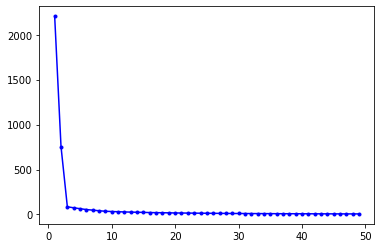

In [ ]:
max_clusters = 50
inertias = np.zeros(50)
cluster_range = range(1, max_clusters)
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit_predict(D)
    inertias[i] = kmeans.inertia_

plt.plot(cluster_range, inertias[cluster_range], c='b', marker='.')

#how do we pick a good k? 
#we generated the data and know what the correct k is, but in general, we don't. 
#one way that in practice that we decide k is called the "elbo method". 
#We will plot the inertia for various k's 
#and then pick the point when the inertia stops rapidly improving.

#basicall, it caculates the inertia for each cluster numbers
#we will look for the point where it starts getting flat
#and decide the x value of that point as the number of clusters

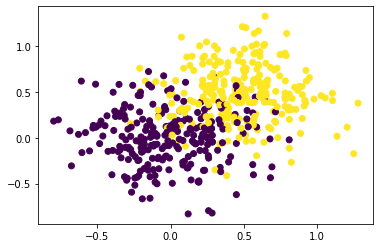

In [ ]:
# we will use a new set of data

D, labels = make_blobs(n_samples=500, centers=[[0,0], [.5, .5]], cluster_std=.3, random_state=0)
plt.scatter(D[:,0], D[:,1], c=labels)

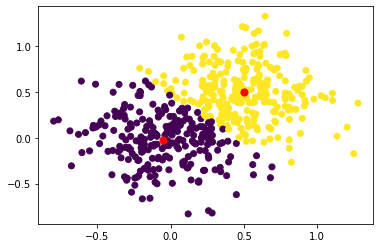

In [ ]:
#we will assume that there are two clusters.

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(D)

centers = kmeans.cluster_centers_
plt.scatter(D[:,0], D[:,1], c=pred_labels)
plt.scatter(centers[:,0], centers[:,1], s=50, c='red')